In [2]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

## Part 1: A little visualization exercise

Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
As you will later realize, these are famous datasets!
Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  

It's ok to just download these files to disk by right-clicking on each one, but if you use Python and `urllib` or `urllib2` to get them, I'll really be impressed. If you don't know how to do that, I recommend opening up Google and typing "download file using Python" or something like that. When interpreting the search results remember that _stackoverflow_ is your friend.

In [3]:
import urllib.request

data_1_link = "https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv"
data_2_link = "https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data2.tsv"
data_3_link = "https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data3.tsv"
data_4_link = "https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data4.tsv"

urllib.request.urlretrieve(data_1_link, "Data_1")
urllib.request.urlretrieve(data_2_link, "Data_2")
urllib.request.urlretrieve(data_3_link, "Data_3")
urllib.request.urlretrieve(data_4_link, "Data_4")

('Data_4', <http.client.HTTPMessage at 0x18e4a155cd0>)

In [4]:
# or by pandas ! 
df1 = pd.read_csv(data_1_link, sep='\t')
df2 = pd.read_csv(data_2_link, sep='\t')
df3 = pd.read_csv(data_3_link, sep='\t')
df4 = pd.read_csv(data_4_link, sep='\t')

C_names = ['x-values', 'y-values' ]
df1.columns = C_names
df2.columns = C_names
df3.columns = C_names
df4.columns = C_names

df1

x-values  y-values
0         8      6.95
1        13      7.58
2         9      8.81
3        11      8.33
4        14      9.96
5         6      7.24
6         4      4.26
7        12     10.84
8         7      4.82
9         5      5.68

#### Excercise
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
>      * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 

In [5]:
dataframes = [df1, df2, df3, df4]

for index, df in enumerate(dataframes):
    xmean = np.mean(df['x-values'])
    ymean = np.mean(df['y-values'])
    
    print(f'Mean of x-values and y-values in Data_{index+1}:   {xmean:.2f} and {ymean:.2f}')
    

Mean of x-values and y-values in Data_1:   8.90 and 7.45
Mean of x-values and y-values in Data_2:   8.90 and 7.34
Mean of x-values and y-values in Data_3:   8.90 and 7.50
Mean of x-values and y-values in Data_4:   9.10 and 7.59


#### Excercise
> * **Now calculate the variance for all of the various sets of $x$- and $y$-values, by using the `numpy` function `var`. Print it to three decimal places.**

In [6]:
dataframes = [df1, df2, df3, df4]

for index, df in enumerate(dataframes):
    xmean = np.var(df['x-values'])
    ymean = np.var(df['y-values'])
    
    print(f'Variance of x-values and y-values in Data_{index+1}:   {xmean:.3f} and {ymean:.3f}')

Variance of x-values and y-values in Data_1:   10.890 and 4.095
Variance of x-values and y-values in Data_2:   10.890 and 3.832
Variance of x-values and y-values in Data_3:   10.890 and 4.122
Variance of x-values and y-values in Data_4:   10.890 and 4.030


#### Excercise
> * **Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also print to three decimal places).**

In [7]:
np.corrcoef(df1['x-values'], df1['y-values'])[0][1].round(3)

0.815

In [8]:
df.corr()

x-values  y-values
x-values      1.00      0.81
y-values      0.81      1.00

#### Excercise
> * **The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this**
> ```
> from scipy import stats
> slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
>```

##### ANSWER: 
The linregress function from the scipy.stats module to perform linear regression and fit a straight line $f(x) = a x + b$ to the given data. The linregress function returns the slope a and intercept b of the line, among other statistics.

In [9]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df1['x-values'],df1['y-values'])

a = slope
b = intercept

print(f"a: {a:.2f}, b: {b:.2f}")


a: 0.50, b: 3.00


In [10]:
dataframes = [df1, df2, df3, df4]

for index, df in enumerate(dataframes):
    slope, intercept, r_value, p_value, std_err = linregress(df['x-values'],df['y-values'])
    
    a = slope
    b = intercept
    
    print(f"Data_{index}:\t a = {a:.2f}  and  b = {b:.2f}")
    

Data_0:	 a = 0.50  and  b = 3.00
Data_1:	 a = 0.49  and  b = 2.99
Data_2:	 a = 0.51  and  b = 3.01
Data_3:	 a = 0.50  and  b = 3.08


The slope `a` of a line in a two-dimensional plane is the rate of change of the dependent variable with respect to the independent variable. In other words, it represents the steepness of the line and how much the line rises or falls for each unit increase in the independent variable.

The intercept `b` of a line is the point at which the line crosses the vertical axis (y-axis) of the plane, when the independent variable (x) is equal to zero. It represents the value of the dependent variable when the independent variable is zero.

Together, the slope and intercept define the equation of the line $f(x) = a x + b$. The value of `a` represents the slope of the line, and the value of `b` represents the intercept.

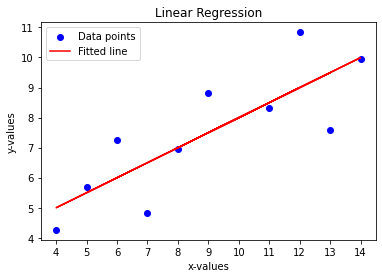

In [11]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df1['x-values'], df1['y-values'])

a = slope
b = intercept

plt.scatter(df1['x-values'], df1['y-values'], color='blue', label='Data points')

x = df1['x-values']
y = a * x + b
plt.plot(x, y, color='red', label='Fitted line')

plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('Linear Regression')
plt.xticks(range(4,15,1))
plt.legend()
plt.show()

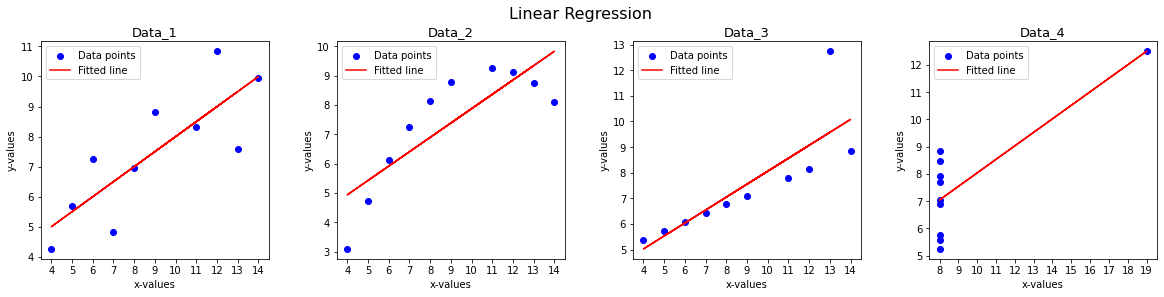

In [12]:
from scipy.stats import linregress
dataframes = [df1, df2, df3, df4]
fig = plt.figure(figsize=(20,4))
plt.suptitle('Linear Regression', fontsize=16,  y=1)
fig.subplots_adjust( wspace=.3)
for index, df in enumerate(dataframes):
    slope, intercept, r_value, p_value, std_err = linregress(df['x-values'],df['y-values'])
    a = slope
    b = intercept 
    
    ax= plt.subplot(1,4,index+1)
    ax.scatter(df['x-values'], df['y-values'], color='blue', label='Data points')

    x = df['x-values']
    y = a * x + b
    ax.plot(x, y, color='red', label='Fitted line')

    plt.xlabel('x-values')
    plt.ylabel('y-values')
    plt.title(f'Data_{index+1}', fontsize=13)
    plt.xticks(range(min(df['x-values']),max(df['x-values'])+1,1))
    plt.legend()

`Data_0:	 a = 0.50  and  b = 3.00
Data_1:	 a = 0.49  and  b = 2.99
Data_2:	 a = 0.51  and  b = 3.01
Data_3:	 a = 0.50  and  b = 3.08`

#### Excercise
> * **Comment on the results from the previous steps. What do you observe?**

#### Excercise
> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/anscombe.png).)

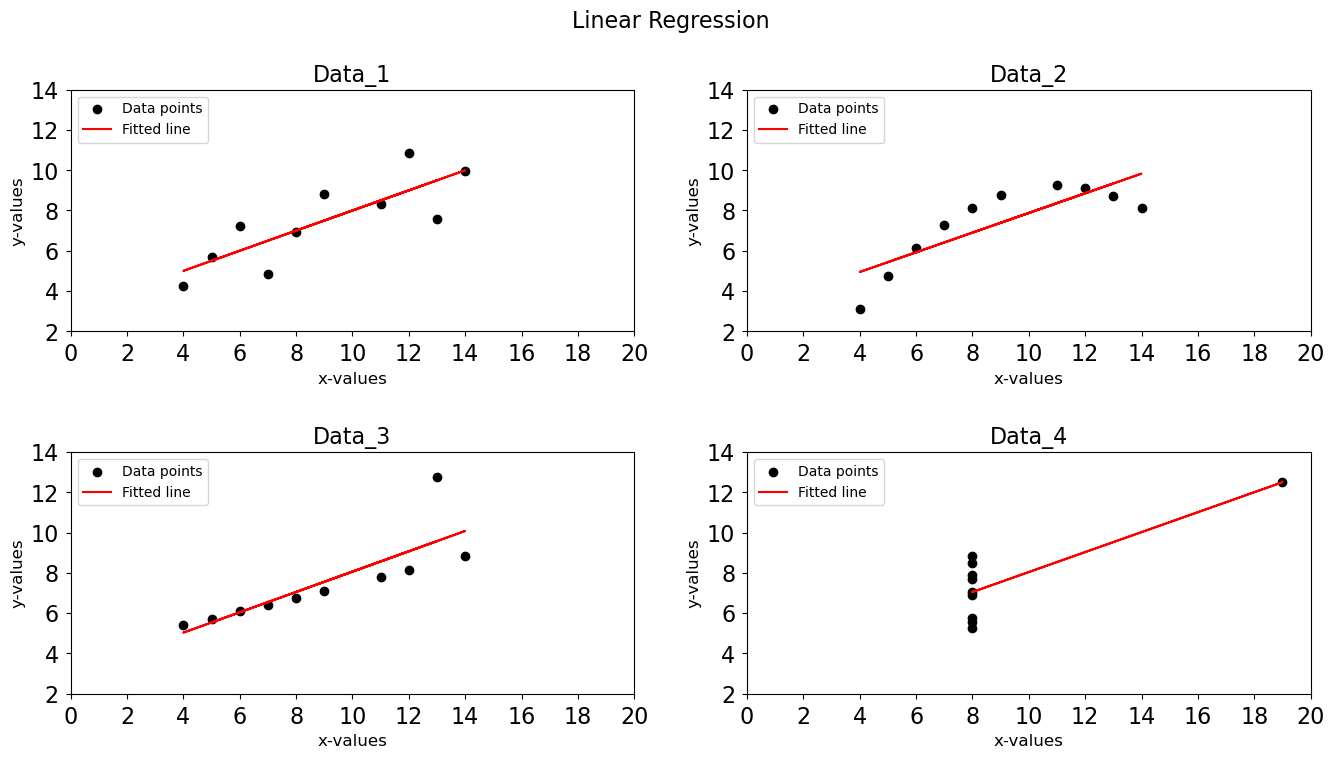

In [13]:
fig, ax = plt.subplots(2,2,figsize=(16,8), dpi=100, sharex=False, sharey=False)
fig.subplots_adjust( wspace=.2, hspace=.5 )
plt.suptitle('Linear Regression', fontsize=16)


dataframes = [df1, df2, df3, df4]
for index, axes in enumerate(ax.flatten()):
        df = dataframes[index]
        axes.scatter(df['x-values'], df['y-values'], color='black', label='Data points')
        
        slope, intercept, r_value, p_value, std_err = linregress(df['x-values'],df['y-values'])
        a = slope
        b = intercept       

        x = df['x-values']
        y = a * x + b
        axes.plot(x, y, color='red', label='Fitted line')

        axes.set_xlabel('x-values', fontsize=12)
        axes.set_ylabel('y-values', fontsize=12)
        axes.set_title(f'Data_{index+1}', fontsize=16)
        axes.set_xlim(0, 20); axes.set_ylim(2, 14);
        axes.set_yticks(range(2,15,2));
        axes.set_xticks(range(0, 21, 2));        
        axes.tick_params(axis ='both', which ='major', labelsize = 16, pad = 5, colors ='black')
        axes.legend(loc=2)

#### Excercise
> * Explain - in your own words - what you think my point with this exercise is (see below for tips on this).


Get more insight in the ideas behind this exercise by reading [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). Here you can also get an explanation of why the datasets are actually famous - I mean they have their own Wikipedia page!!

Now that you get a better sense of why data visualization is an important and powerful tool, you are ready to get a small intro on the topic! Again, don't watch the video until **after** you've done exercise 1.1

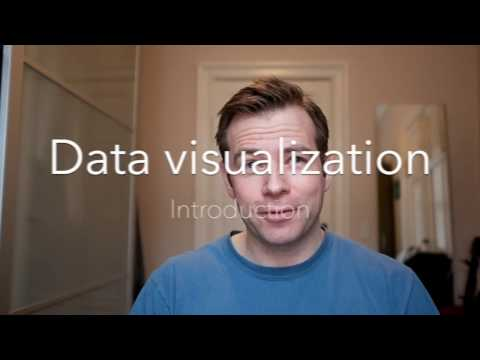

In [14]:
from IPython.display import YouTubeVideo
YouTubeVideo("9D2aI30AMhM",width=800, height=450)

**Excercise:* Questions for the lecture**
> * What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?



Data refers to the primary information or content that is being stored, processed or transmitted, while metadata is "data about data". It provides additional information about the data, such as its structure, format, context, or relevant characteristics.

In the context of GPS tracks, data would refer to the actual geographical coordinates, timestamps, and other details collected from the GPS device. Metadata for GPS tracks might include information such as the name or description of the track, the date and time the track was recorded, and the type of GPS device used. This metadata helps to provide context and organization for the GPS data and can be used for various purposes, such as searching, sorting, and analyzing the tracks.

> * Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult.

> * Simpson's paradox is hard to explain. Come up with your own example - or find one on line.

> * In your own words, explain the differnece between *exploratory* and *explanatory* data analysis.

Exploratory data analysis is a flexible and iterative approach to understanding and summarizing the main features of a dataset. The goal of EDA is to identify patterns, relationships, and trends in the data through visualizations and summary statistics. The purpose of EDA is to provide a preliminary understanding of the data, identify any issues or anomalies, and suggest areas for further investigation. EDA is typically an open-ended process, with the analyst iteratively exploring and refining their understanding of the data as they go.

Explanatory data analysis, on the other hand, focuses on explaining or proving a hypothesis or a relationship between variables in the data. The goal of XDA is to find evidence that supports or refutes a particular hypothesis, and to provide a clear and concise explanation of the relationships in the data. XDA typically involves the use of statistical methods, such as regression analysis, to test hypotheses and draw conclusions. The results of XDA are often used to make decisions or inform policy, and the focus is on communicating the results in a clear and understandable way.

In summary, EDA is an exploratory process used to gain an initial understanding of a dataset, while XDA is a more focused and hypothesis-driven approach used to explain relationships and make decisions based on the data.

## Part 2: Visualizing patterns in the data

Visualizing data is a powerful technique that helps us exploiting the human eye, and make complex patterns easier to identify. 

Let's see if we can detect any interesting patterns in the big crime-data file from San Francisco you downloaded last week. We'll again only look at the focus-crimes.

In [15]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY',
                   'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM',
                   'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

focuscrimes = sorted(focuscrimes)

> *Exercise*: More temporal patterns. Last time we plotted the development over time (how each of the focus crimes changed over time, year-by-year). Today we'll start by looking at the developments across the months, weekdays, and across the 24 hours of the day. 
>
> **Note:** restrict yourself to the dataset of *entire years*.


In [16]:
data_link = 'D:\DTU\SP 2023\Social Data Viz\Data'
data = pd.read_csv(data_link+'\Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

# frist 14 columns
df = data.iloc[:, :14] 
df.loc[:, 'Date'] = pd.to_datetime(df['Date']) # convert date column to datetime object

# Filter date # 'YYYY-MM-DD'
start_date = pd.to_datetime('2003-01-01')
end_date = pd.to_datetime('2017-12-31')

df = df[ (df['Date'] >= start_date) & (df['Date'] <= end_date)]

> * **Weekly patterns**. 
    * Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/weekdays.png). Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?**

In [17]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.DayOfWeek = pd.Categorical(df.DayOfWeek, categories=order, ordered=True)

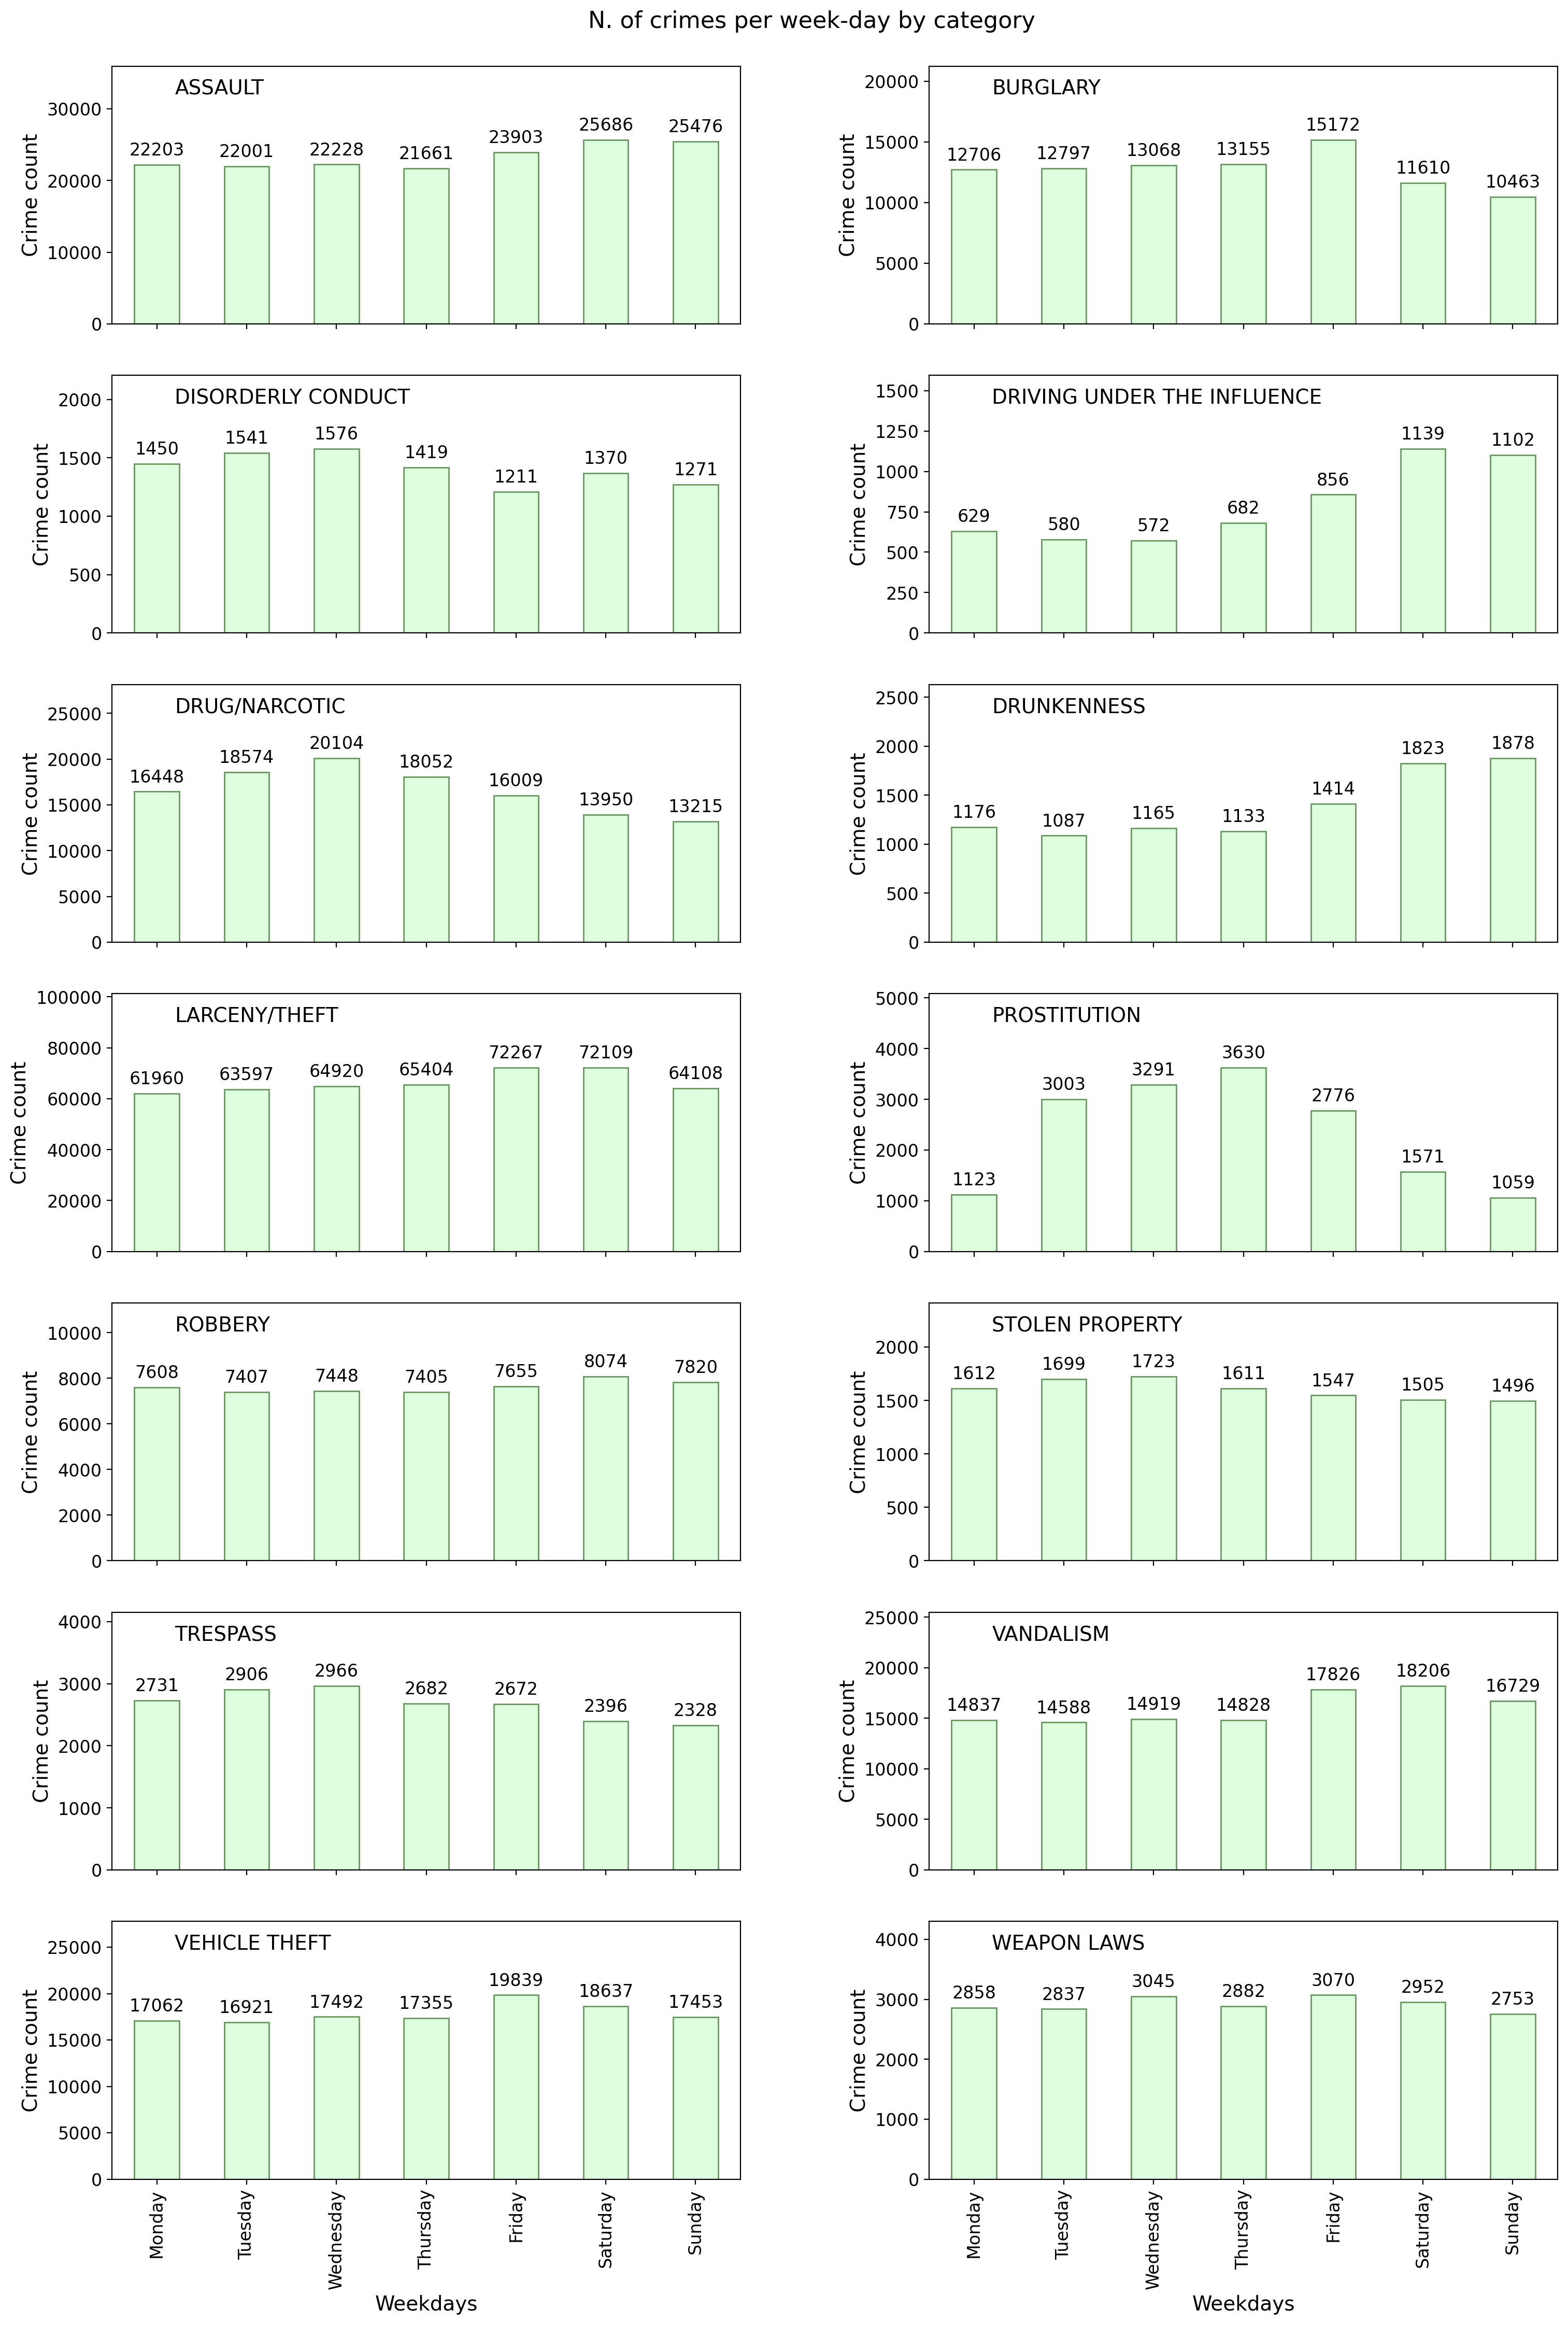

In [18]:
# thorugh pandas plot
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, ax = plt.subplots(7,2, figsize=(18,27), dpi=200 , sharex=True, sharey=False)

fig.subplots_adjust( wspace=.3, hspace=.2 )
plt.suptitle('N. of crimes per week-day by category', fontsize=16, y=0.9);

for index, axes in enumerate(ax.flatten()):
    ab = df[df['Category'] == focuscrimes[index]].DayOfWeek.value_counts().sort_index().plot(kind='bar'
                                                                           ,ax=axes,color='#DDFFDD', edgecolor="#6A9662");
    axes.margins(0.04,0.4)
    axes.text(0.1,0.95,focuscrimes[index],transform=axes.transAxes, va='top', fontsize=14)
    axes.tick_params(axis='both', which='major', labelsize=12)
    axes.set_xlabel('Weekdays', fontsize=14)
    axes.set_ylabel('Crime count', fontsize=14)
    
    for p in axes.patches:
        axes.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
    

> * *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?

In [19]:
import calendar
df['MonthName'] = df['Date'].dt.month.apply(lambda x: calendar.month_name[x])

df.MonthName = pd.Categorical(df.MonthName, categories=calendar.month_name[1:13], ordered=True)

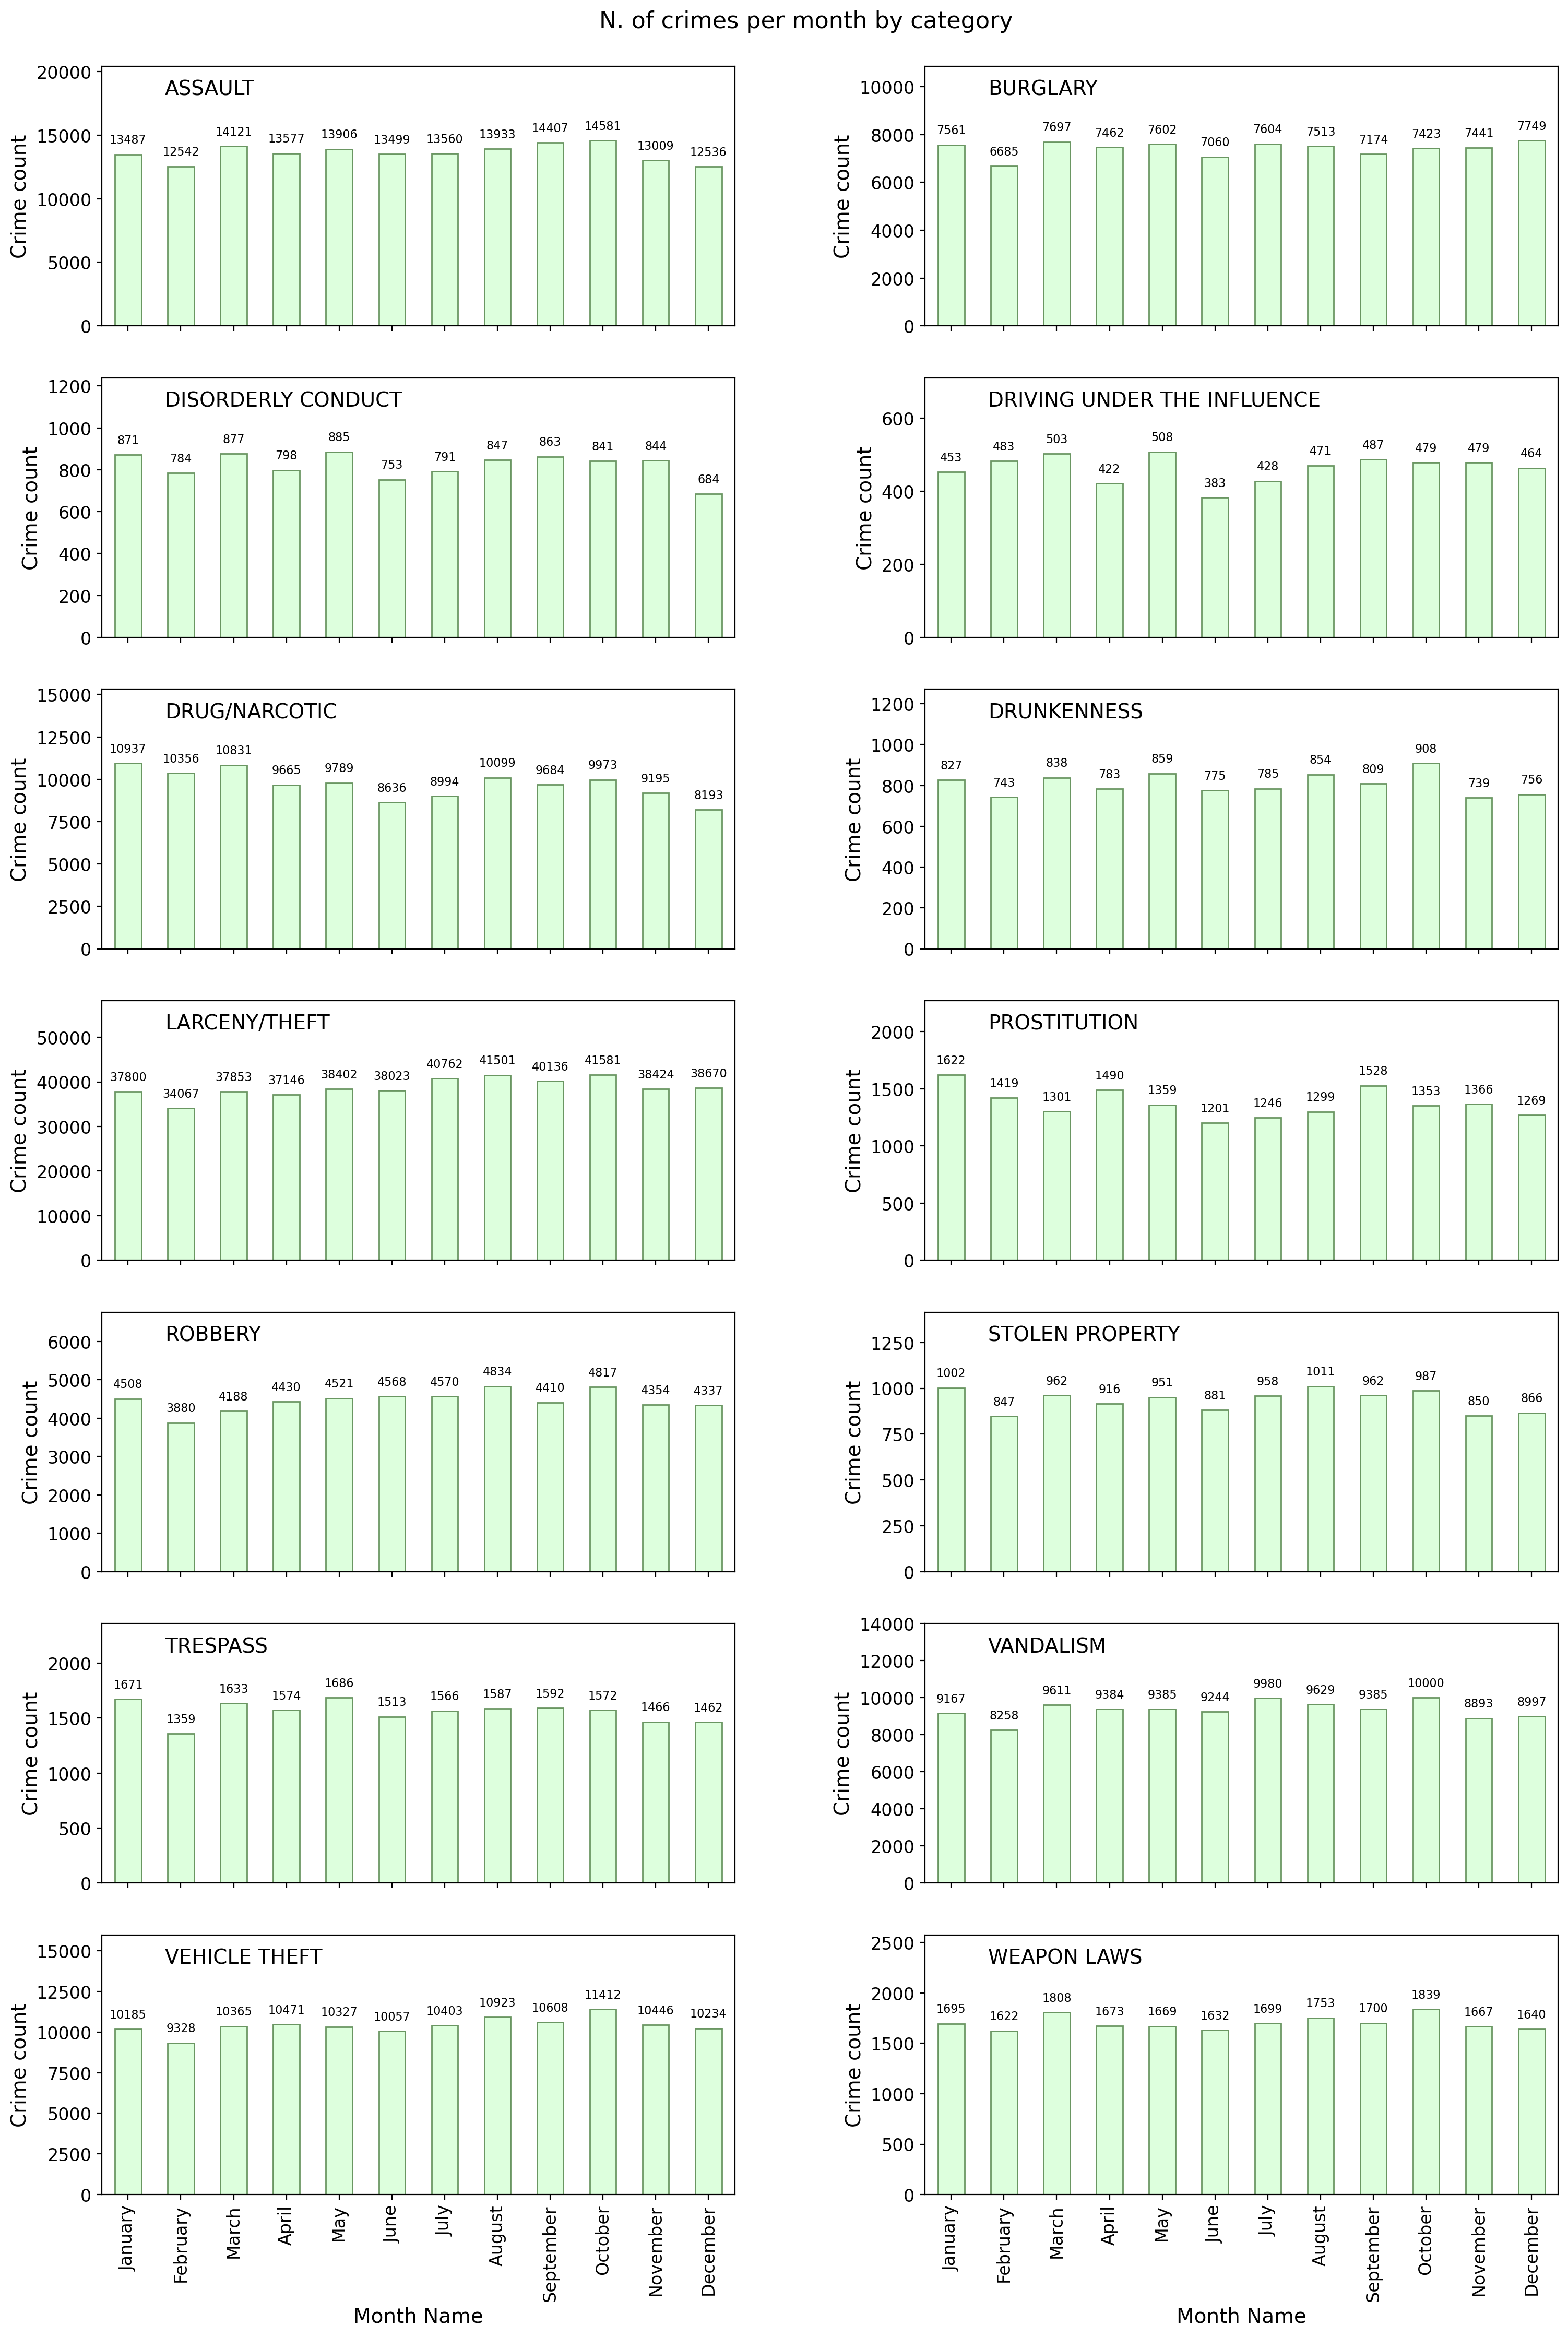

In [20]:
fig, ax = plt.subplots(7,2, figsize=(18,27), dpi=200 , sharex=True, sharey=False)

fig.subplots_adjust( wspace=.3, hspace=.2 )
plt.suptitle('N. of crimes per month by category', fontsize=16, y=0.9);

for index, axes in enumerate(ax.flatten()):
    ab = df[df['Category'] == focuscrimes[index]].MonthName.value_counts().sort_index().plot(kind='bar'
                                                                           ,ax=axes,color='#DDFFDD', edgecolor="#6A9662");
    axes.margins(0.04,0.4)
    axes.text(0.1,0.95,focuscrimes[index],transform=axes.transAxes, va='top', fontsize=14)
    axes.tick_params(axis='both', which='major', labelsize=12)
    axes.set_xlabel('Month Name', fontsize=14)
    axes.set_ylabel('Crime count', fontsize=14)
    
    for p in axes.patches:
        axes.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

> * *The 24 hour cycle*. We can also forget about weekday and simply count up the number of each crime-type that occurs in the dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 

In [21]:
df.head()

PdId  IncidntNum  Incident Code       Category  \
0   4133422003074    41334220           3074        ROBBERY   
1   5118535807021    51185358           7021  VEHICLE THEFT   
2   4018830907021    40188309           7021  VEHICLE THEFT   
3  11014543126030   110145431          26030          ARSON   
4  10108108004134   101081080           4134        ASSAULT   

                Descript DayOfWeek       Date   Time PdDistrict Resolution  \
0  ROBBERY, BODILY FORCE    Monday 2004-11-22  17:50  INGLESIDE       NONE   
1      STOLEN AUTOMOBILE   Tuesday 2005-10-18  20:00       PARK       NONE   
2      STOLEN AUTOMOBILE    Sunday 2004-02-15  02:00   SOUTHERN       NONE   
3                  ARSON    Friday 2011-02-18  05:27  INGLESIDE       NONE   
4                BATTERY    Sunday 2010-11-21  17:00   SOUTHERN       NONE   

                  Address       X     Y  \
0   GENEVA AV / SANTOS ST -122.42 37.71   
1  TURK ST / STJOSEPHS AV -120.50 90.00   
2     BRANNAN ST / 1ST ST -120.50 90.00   
3   0 Block of SANJUAN AV -122.44 37.72   
4    400 Block of 10TH ST -122.41 37.77   

                                       location MonthName  
0    POINT (-122.420084075249 37.7083109744362)  November  
1                POINT (-120.50000000000001 90)   October  
2                POINT (-120.50000000000001 90)  February  
3  POINT (-122.43622001281001 37.7243766140428)  February  
4    POINT (-122.410541166987 37.7709130566165)  November

In [22]:
#another column to the DataFrame with the hour of the day by using the dt.hour attribute of the Timestamp object in the 'Time' column.
df['hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

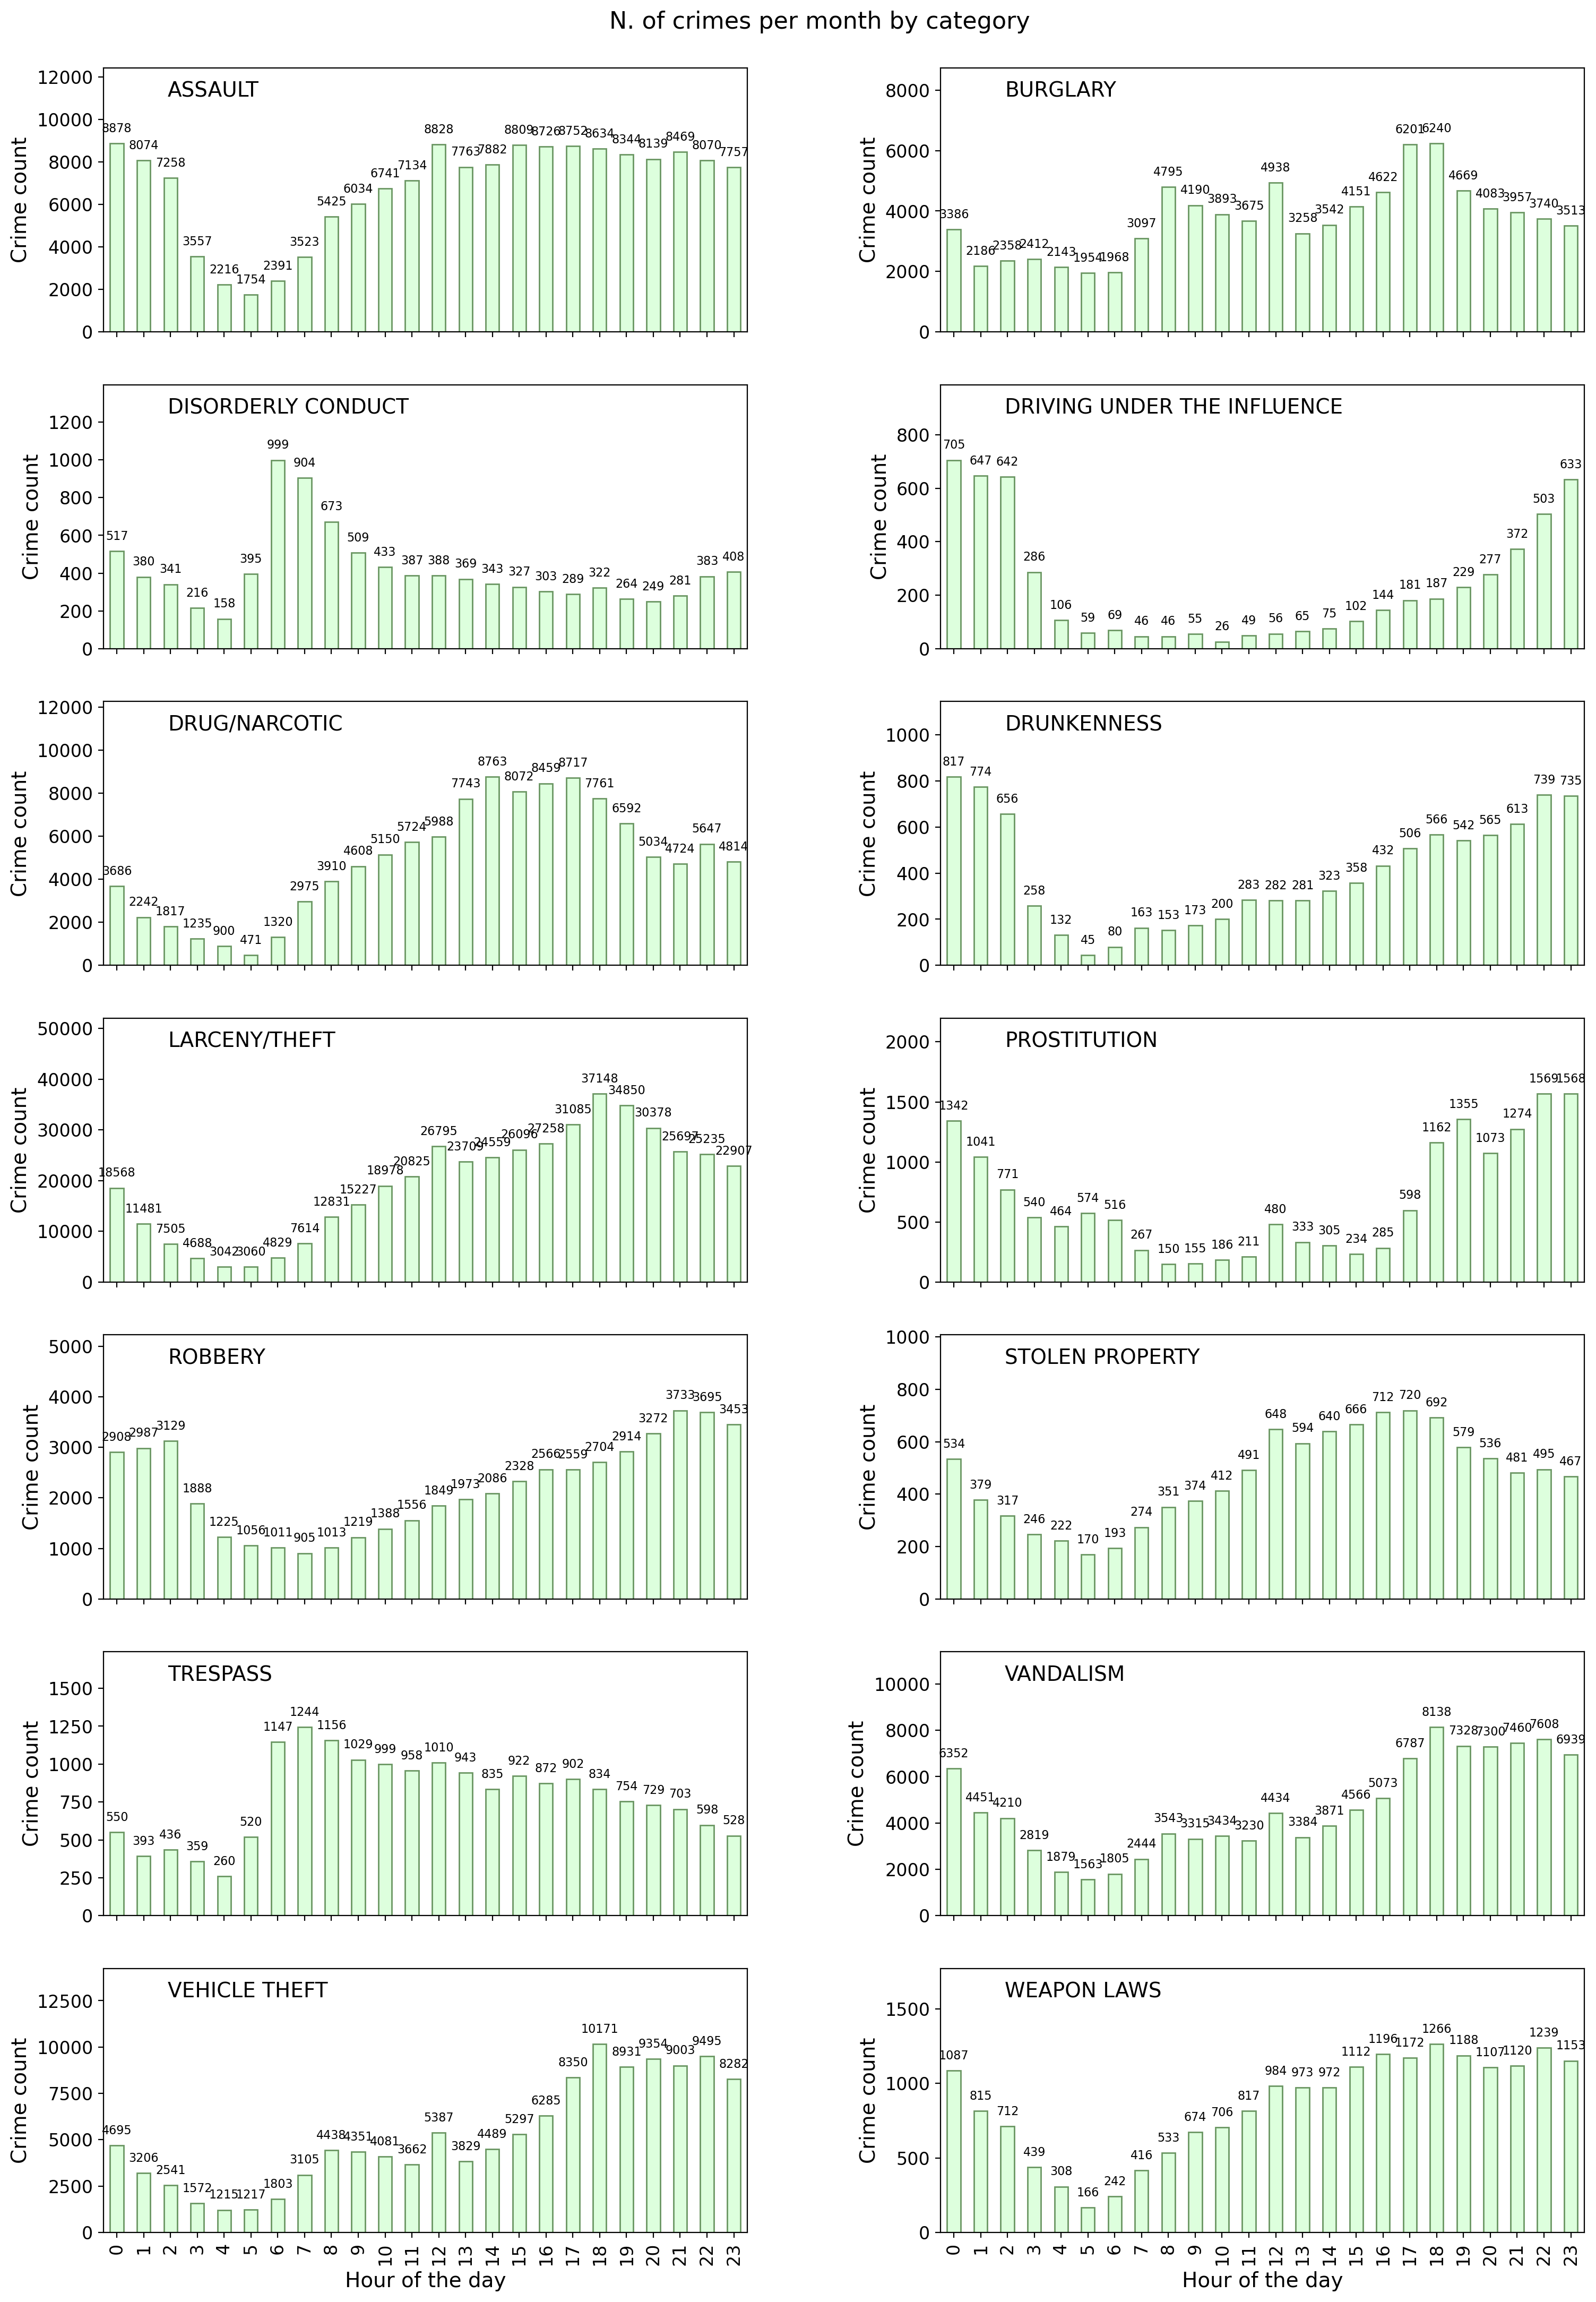

In [23]:
fig, ax = plt.subplots(7,2, figsize=(18,27), dpi=200 , sharex=True, sharey=False)

fig.subplots_adjust( wspace=.3, hspace=.2 )
plt.suptitle('N. of crimes per month by category', fontsize=16, y=0.9);

for index, axes in enumerate(ax.flatten()):
    ab = df[df['Category'] == focuscrimes[index]].hour.value_counts().sort_index().plot(kind='bar'
                                                                           ,ax=axes,color='#DDFFDD', edgecolor="#6A9662");
    axes.margins(0.04,0.4)
    axes.text(0.1,0.95,focuscrimes[index],transform=axes.transAxes, va='top', fontsize=14)
    axes.tick_params(axis='both', which='major', labelsize=12)
    axes.set_xlabel('Hour of the day', fontsize=14)
    axes.set_ylabel('Crime count', fontsize=14)
    
    for p in axes.patches:
        axes.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

> * *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

In [24]:
df.head()

PdId  IncidntNum  Incident Code       Category  \
0   4133422003074    41334220           3074        ROBBERY   
1   5118535807021    51185358           7021  VEHICLE THEFT   
2   4018830907021    40188309           7021  VEHICLE THEFT   
3  11014543126030   110145431          26030          ARSON   
4  10108108004134   101081080           4134        ASSAULT   

                Descript DayOfWeek       Date   Time PdDistrict Resolution  \
0  ROBBERY, BODILY FORCE    Monday 2004-11-22  17:50  INGLESIDE       NONE   
1      STOLEN AUTOMOBILE   Tuesday 2005-10-18  20:00       PARK       NONE   
2      STOLEN AUTOMOBILE    Sunday 2004-02-15  02:00   SOUTHERN       NONE   
3                  ARSON    Friday 2011-02-18  05:27  INGLESIDE       NONE   
4                BATTERY    Sunday 2010-11-21  17:00   SOUTHERN       NONE   

                  Address       X     Y  \
0   GENEVA AV / SANTOS ST -122.42 37.71   
1  TURK ST / STJOSEPHS AV -120.50 90.00   
2     BRANNAN ST / 1ST ST -120.50 90.00   
3   0 Block of SANJUAN AV -122.44 37.72   
4    400 Block of 10TH ST -122.41 37.77   

                                       location MonthName  hour  
0    POINT (-122.420084075249 37.7083109744362)  November    17  
1                POINT (-120.50000000000001 90)   October    20  
2                POINT (-120.50000000000001 90)  February     2  
3  POINT (-122.43622001281001 37.7243766140428)  February     5  
4    POINT (-122.410541166987 37.7709130566165)  November    17

In [25]:
df['DayOfWeek']=df['DayOfWeek'].astype('str')
df['HourOfWeek'] = df['DayOfWeek'].map(lambda x: {'Monday': 0, 'Tuesday': 24, 'Wednesday': 48, 'Thursday': 72, 'Friday': 96, 'Saturday': 120, 'Sunday': 144}[x]) + df['hour']

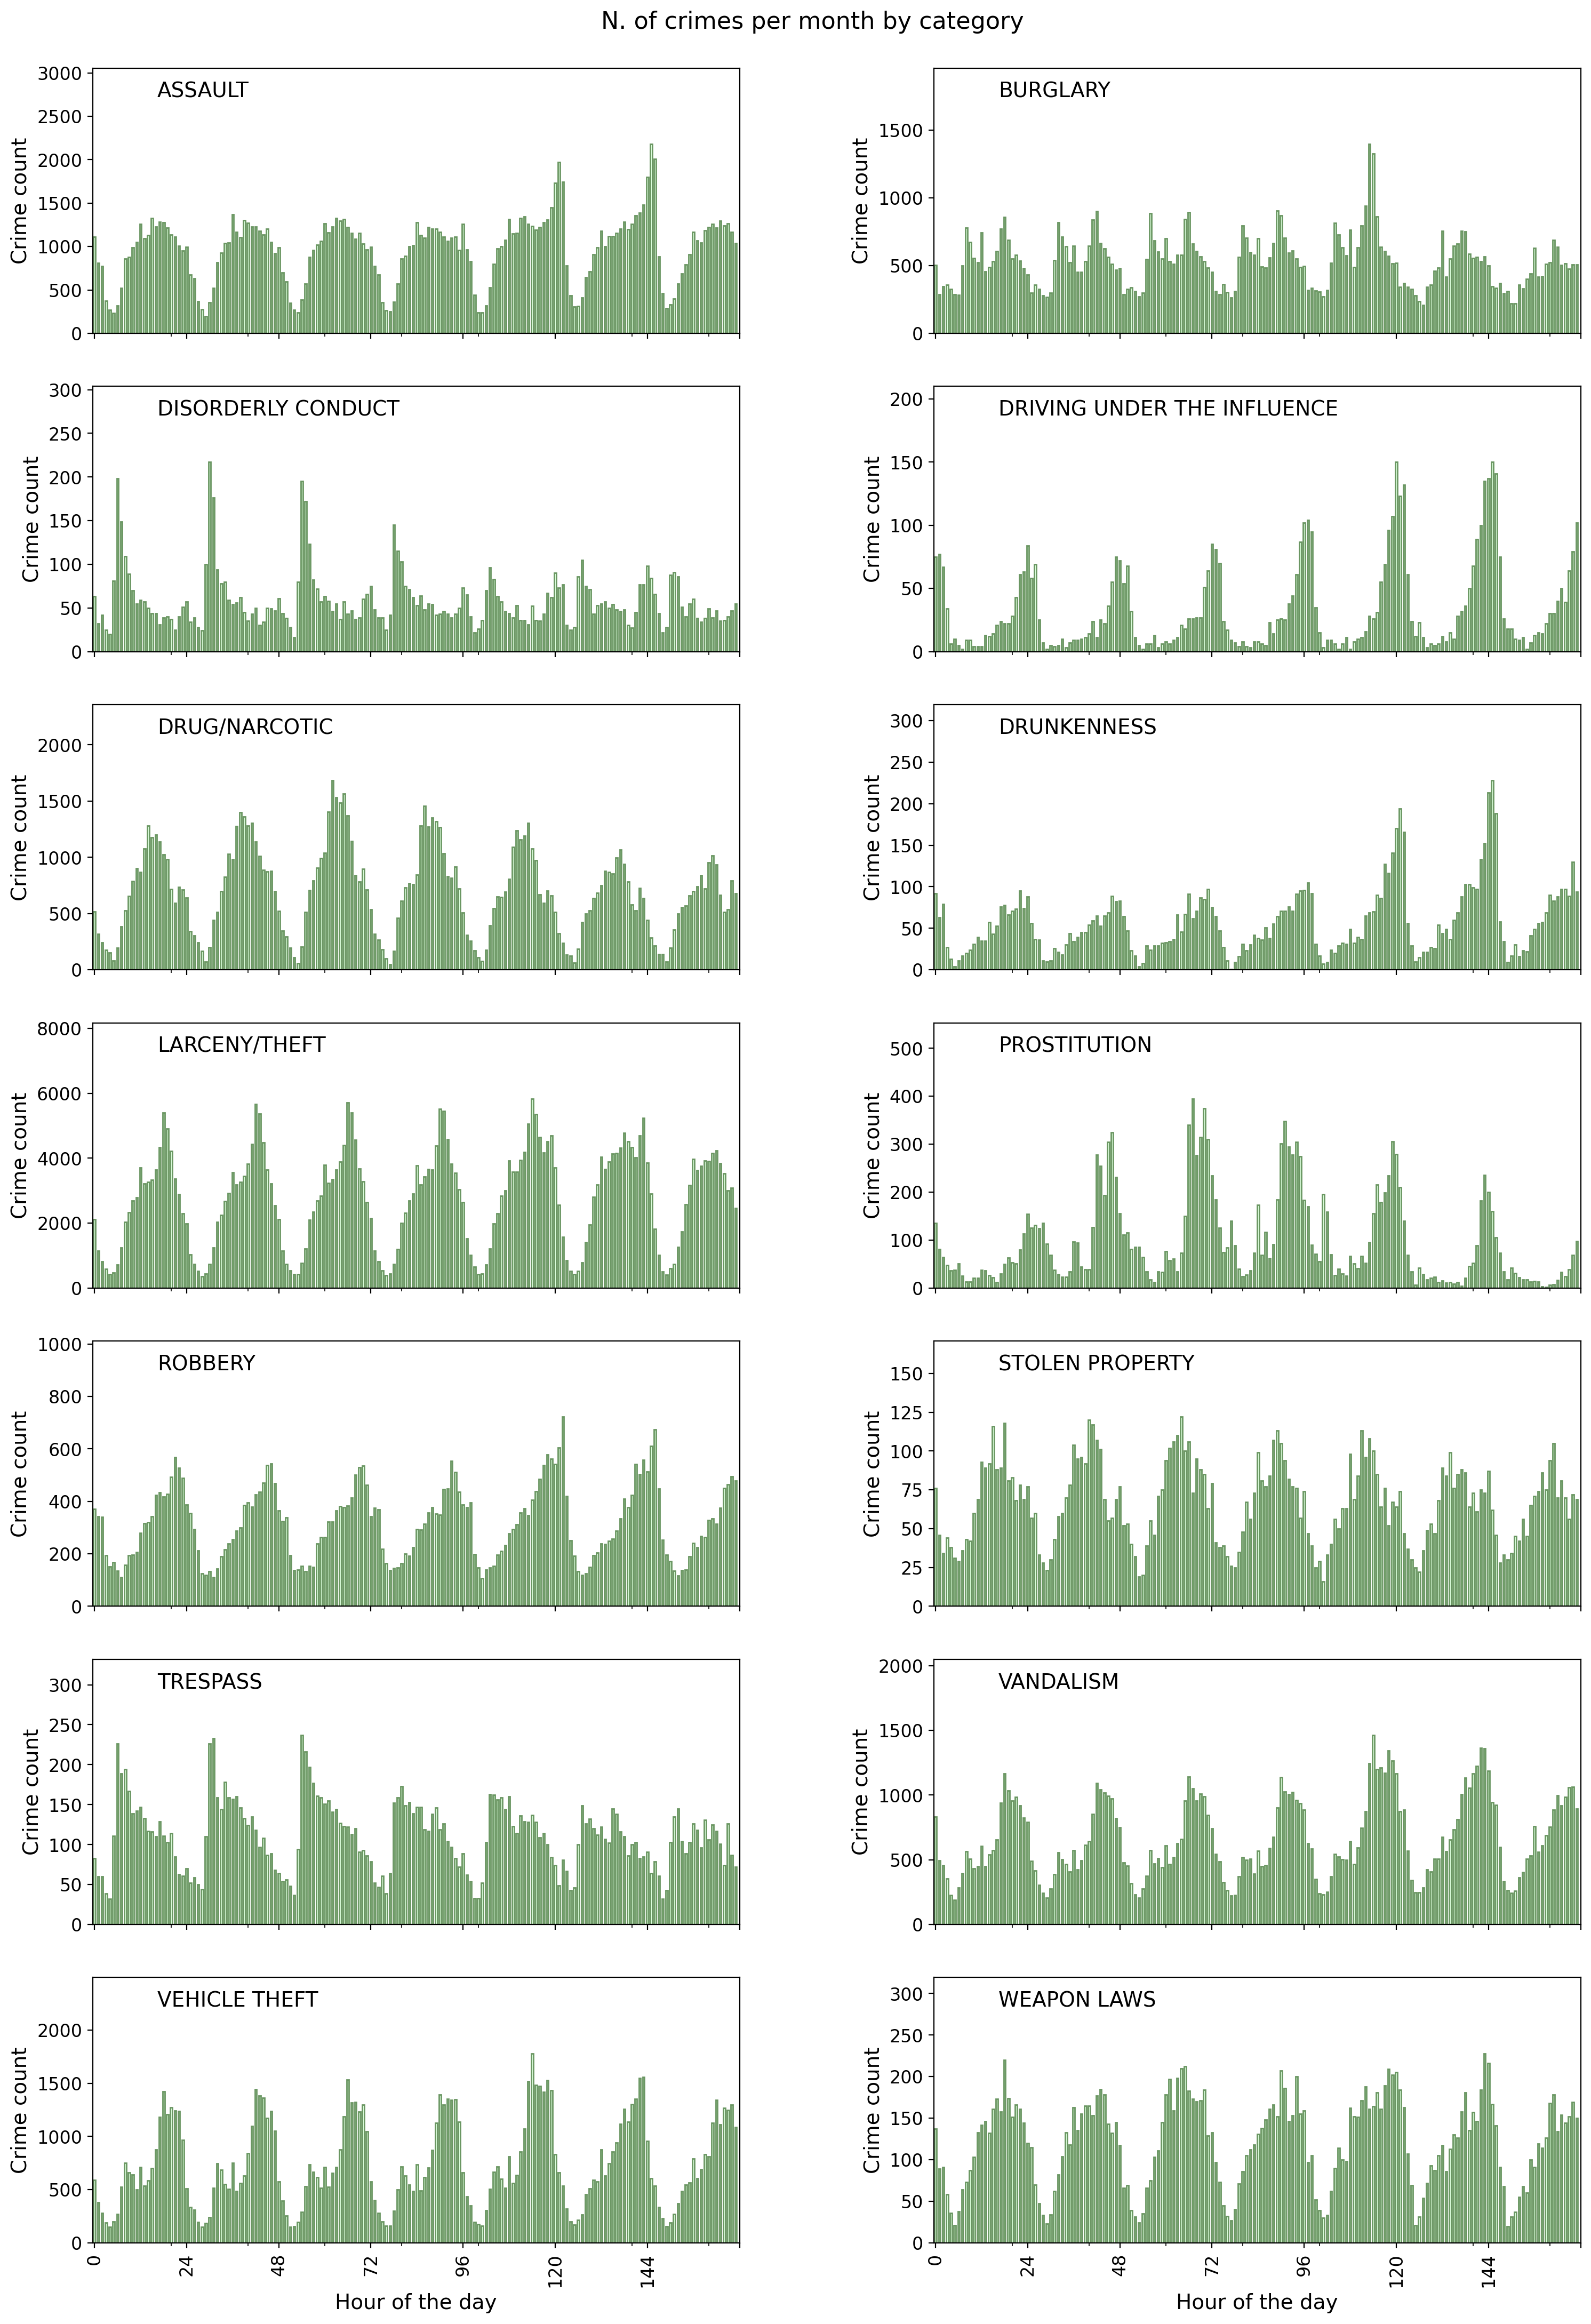

In [26]:
fig, ax = plt.subplots(7,2, figsize=(18,27), dpi=200 , sharex=True, sharey=False)

fig.subplots_adjust( wspace=.3, hspace=.2 )
plt.suptitle('N. of crimes per month by category', fontsize=16, y=0.9);

for index, axes in enumerate(ax.flatten()):
    ab = df[df['Category'] == focuscrimes[index]].HourOfWeek.value_counts().sort_index().plot(kind='bar'
                                                                           ,ax=axes,color='#DDFFDD', edgecolor="#6A9662");
    axes.margins(0.04,0.4)
    axes.text(0.1,0.95,focuscrimes[index],transform=axes.transAxes, va='top', fontsize=14)
    axes.set_xticks(range(0,170,24))
    axes.tick_params(axis='both', which='major', labelsize=12)
    axes.set_xlabel('Hour of the day', fontsize=14)
    axes.set_ylabel('Crime count', fontsize=14)

# Part 4: Exploring other types of plots for temporal data

We continue our mini-break from barcharts by exploring more ways to plot temporal data.

> *Exercise (extra hard):* Other cool ways to plot temporal data. I am going to introduce three different plot-types. Then your job is to choose a part of the crime-data that you care about - and plot it using these new ways of visualizing data. 
>
>I recommend that you choose a different part of the crime-data for each plot-type.

> * **Calendar plots.** 
    * Get started on calendar plots [here](https://calplot.readthedocs.io/en/latest/). There are other packages for plotting these, those are also OK to use.**

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


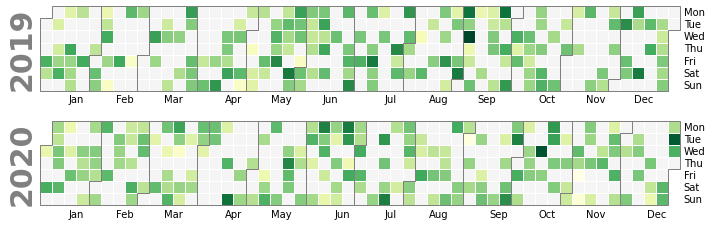

In [27]:
# example from API site
all_days = pd.date_range('1/1/2019', periods=730, freq='D') #pandas.core.indexes.datetimes.DatetimeIndex
days = np.random.choice(all_days, 500) # numpy.ndarray
events = pd.Series(np.random.randn(len(days)), index=days) #pandas.core.series.Series

import calplot
calplot.calplot(events, cmap='YlGn', colorbar=False);

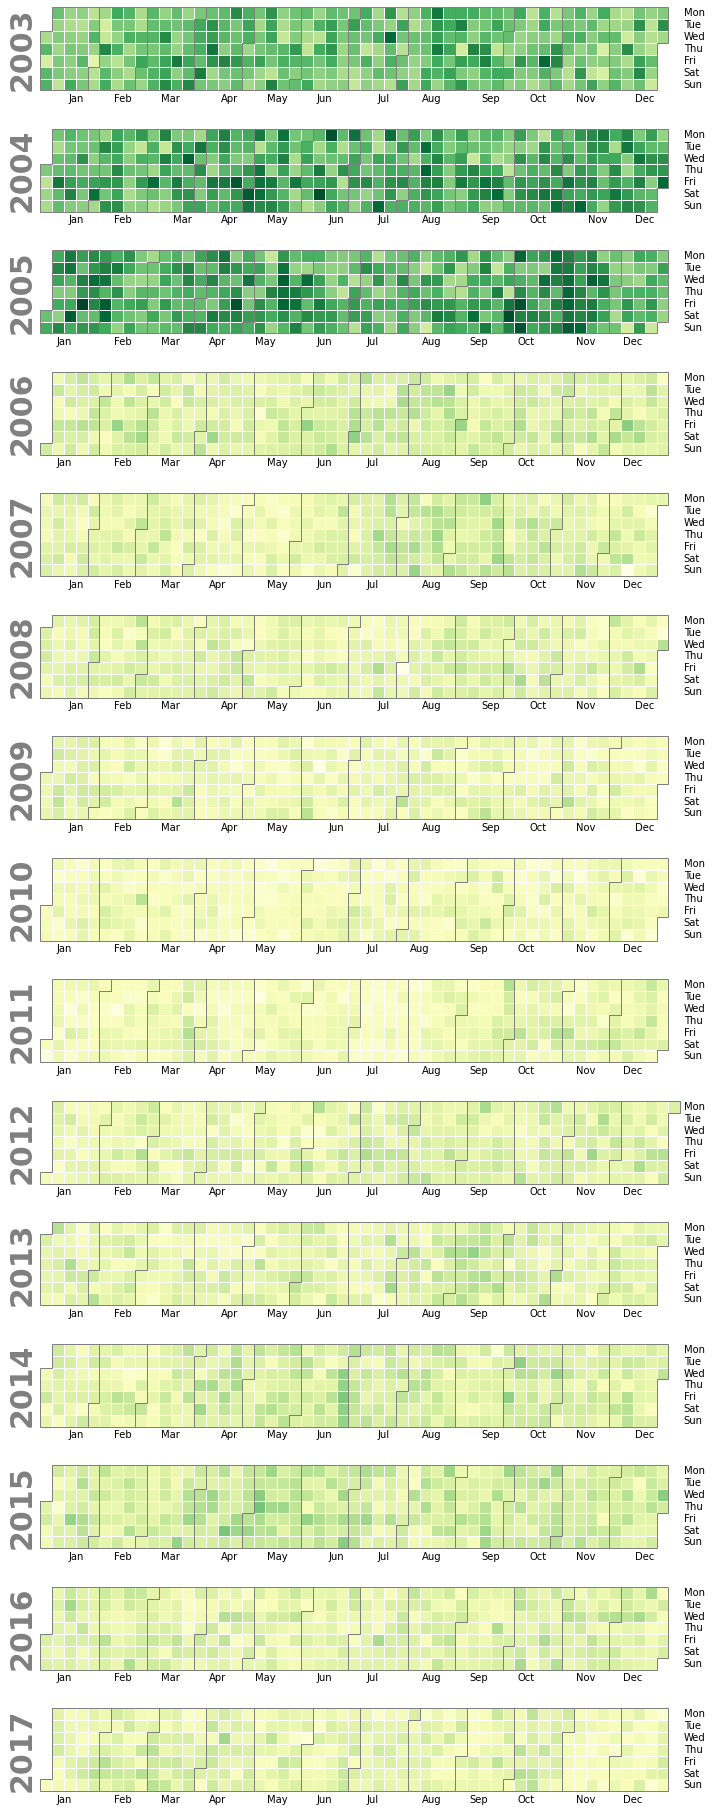

In [28]:
import calplot

cat = 'VEHICLE THEFT'

all_days = df.Date.unique()
events= df[df['Category']==cat].Date.value_counts()
days = df[df['Category']==cat].Date.values


calplot.calplot(events, cmap='YlGn', colorbar=False);

> * [Polar bar chart](https://user-images.githubusercontent.com/12328192/89272649-be76e200-d63e-11ea-97ad-fd1ba5831c89.png). Here I want you to plot a 24-hour pattern of some sort -- those work really well in radial plots (another name for polar plots) because the day  wraps around on itself. You can also try plotting data with patterns from the 168 hours of the week. There's not one super-awesome solution here, you can try using [pure matplotlib](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_bar.html) ... [some examples here](https://www.python-graph-gallery.com/circular-barplot/) or via [plotly](https://plotly.com/python/polar-chart/) (scroll down a bit for the polar barchart).

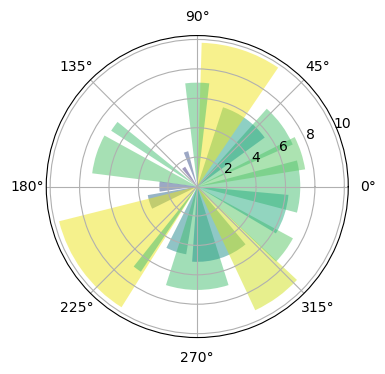

In [29]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)
plt.figure(figsize=(10,4), dpi=100)
ax = plt.subplot(projection='polar')

ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

> * Time series. Time series is a key functionality of `Pandas`, so here I simply recommend starting by searching your favorite search engine for something like `time series` `pandas`

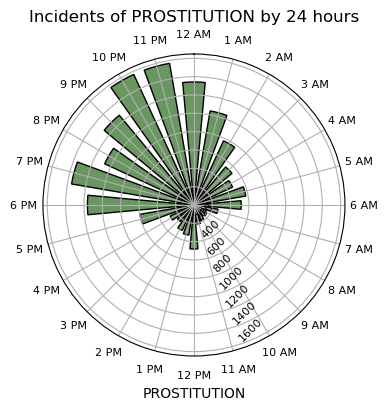

In [52]:
df_prostitution = df[df['Category'] == 'PROSTITUTION']
df_prostitution = df[df['Category'] == 'PROSTITUTION']

# Count the number of incidents in each hour of the week
incidents_per_hour = df_prostitution.groupby(['hour'])['hour'].count()

plt.figure(figsize=(10,4), dpi=100)
ax = plt.subplot(projection='polar')

num_bars = 24  #number of bars = hours = 24
bar_width = 2 * np.pi / num_bars*.7 #bar width or angel, *by 0.7 for better separation
theta = np.linspace(0.0, 2 * np.pi, num_bars, endpoint=False) #create a full circle of angles
heights = incidents_per_hour.values # bar heights
widths = np.full(num_bars, bar_width) #bar widths

# Plot 
ax.bar(theta, heights, width=bar_width, bottom=0.0, linewidth=1, color="#6A9662", edgecolor="black");

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

ax.set_xticks(theta)
hours = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM',
         '12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM']
ax.set_xticklabels(hours, fontsize=8)
ax.set_rlabel_position(160) #rotate elabel to avoid overlap on bars

ax.yaxis.set_tick_params(labelsize=8, rotation =45) #label rotation for better reading

ax.set_xlabel('PROSTITUTION')
#ax.axis("off")
#ax.spines['polar'].set_visible(True)
plt.title('Incidents of PROSTITUTION by 24 hours');

# color='#DDFFDD', edgecolor="#6A9662"

In [54]:
import plotly.graph_objs as go

# Filter the dataframe to only include rows where Category is 'PROSTITUTION'
df_prostitution = df[df['Category'] == 'PROSTITUTION']

# Count the number of incidents in each hour of the week
incidents_per_hour = df_prostitution.groupby(['hour'])['IncidntNum'].count()

# Create the polar plot
fig = go.Figure()

# Add the bars to the plot
fig.add_trace(go.Barpolar(
    r=incidents_per_hour.values,
    theta=incidents_per_hour.index * 15,
    width=13.5,
    marker_color='#61a4b2',
    marker_line_color='white',
    marker_line_width=1,
    opacity=0.9,
    name='PROSTITUTION'
))

# Update the layout of the plot
fig.update_layout(
    title='Incidents of PROSTITUTION by 24 hours',
    font_size=14,
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, incidents_per_hour.values.max()]
        ),
        angularaxis=dict(
            visible=True,
            tickvals=[i * 15 for i in range(24)],
            ticktext=['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'],
            rotation=90,
            direction="clockwise"
        )
    )
)

# Part 5: Back to visualizing patterns in the data

The next thing we'll be looking into is how crimes break down across the 10 districts in San Francisco.

> *Exercise*: The types of crime and how they take place across San Francisco's police districts.
>  

>  * So now we'll be combining information about `PdDistrict` and `Category` to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.

In [ ]:
df.dropna(inplace=True)
SF = list(df.PdDistrict.unique())
SF

>  * Which has the most crimes? Which has the most focus crimes?

In [ ]:
# Which has the most crimes?
df.PdDistrict.value_counts().idxmax()

In [ ]:
# Which has the most focus crimes?
df[df['Category'].isin(focuscrimes)].PdDistrict.value_counts().idxmax()

>  * Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going:
>    - First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. That's simply a normalized version of [this plot](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimeOccurrencesByCategory.png). Let's call it `P(crime)`.

In [ ]:
plt.figure(figsize=(10,6), dpi=100)
ax = df.Category.value_counts().plot(kind='bar')
plt.title('Crime occurrence by category', fontsize=20);
plt.ylabel('Occurrence', fontsize=16);
plt.xlabel('category', fontsize=16);

>    - Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.

In [ ]:
fig, ax = plt.subplots(5,2, figsize=(18,18), dpi=200 , sharex=True, sharey=False)

fig.subplots_adjust( wspace=.3, hspace=.2 )
plt.suptitle('N. of crimes for each PD district', fontsize=16, y=0.9);

for index, axes in enumerate(ax.flatten()):
    ab = df[(df['PdDistrict'] == SF[index]) & (df['Category'].isin(focuscrimes)) ].Category.value_counts().plot(kind='bar'
                                                                           ,ax=axes,color='#DDFFDD', edgecolor="#6A9662");
    axes.margins(0.04,0.4)
    axes.text(0.1,0.95,SF[index],transform=axes.transAxes, va='top', fontsize=14)
    #axes.set_xticks(range(0,170,24))
    axes.tick_params(axis='both', which='major', labelsize=12)
    axes.set_xlabel('Category', fontsize=14)
    axes.set_ylabel('Crime count', fontsize=14)